## 1. Business Problem Overview

Customer churn refers to the situation where customers stop using a company’s products or services over a given period of time. In subscription based businesses, churn directly impacts recurring revenue and long term profitability.

Reducing churn is critical because acquiring new customers is significantly more expensive than retaining existing ones. High churn rates indicate customer dissatisfaction, poor service quality, pricing issues, or ineffective engagement strategies. Even a small increase in retention can lead to substantial revenue growth.

The objective of this project is to analyze customer churn patterns for a telecommunications company and identify the key factors contributing to customer attrition. Using historical customer data, this analysis aims to uncover actionable insights that can help the business reduce churn and minimize revenue loss.

Key business questions addressed in this analysis include:
- What is the overall customer churn rate?
- Which customer segments are most likely to churn?
- How does churn vary by tenure, contract type, and payment method?
- Which services and customer behaviors are associated with higher churn?
- How much revenue is being lost due to churn?
- What data driven strategies can be recommended to improve customer retention?

## 2. Dataset Loading and Initial Inspection

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [478]:
df = pd.read_csv('Telco_Cusomer_Churn.csv')

In [480]:
# Normalize column names ONCE
df.columns = df.columns.str.lower().str.replace(" ", "")

In [482]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [484]:
df.tail()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [486]:
df.shape

(7043, 21)

In [488]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## 3. Data Structure and Type Analysis

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


## 4. Descriptive Statistics

In [494]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [496]:
df.describe(include="object")

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## 5. Missing Value Investigation

In [499]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [501]:
df["totalcharges"].value_counts().head(10)

totalcharges
         11
20.2     11
19.75     9
20.05     8
19.9      8
19.65     8
45.3      7
19.55     7
20.15     6
20.25     6
Name: count, dtype: int64

In [503]:
df[df["totalcharges"] == " "].shape

(11, 21)

In [505]:
df["churn"].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [507]:
df["paymentmethod"].value_counts()

paymentmethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [509]:
df["contract"].value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

- Dataset has ~7000 customers and 21 features
- Target variable Churn is binary
- Mix of numerical and categorical variables
- TotalCharges appears to be incorrectly typed
- No major missing values detected at first glance

## 6. Data Cleaning and Type Corrections

In [513]:
df["totalcharges"] = df["totalcharges"].replace(" ", np.nan)

In [515]:
df["totalcharges"] = pd.to_numeric(df["totalcharges"])

In [517]:
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [519]:
# Customers with zero tenure have not been billed yet, so total charges are set to 0
df.loc[df["tenure"] == 0, "totalcharges"] = 0

In [521]:
# Fix seniorcitizen mapping at source
df["seniorcitizen"] = df["seniorcitizen"].map({0: "No", 1: "Yes"})

In [523]:
df["seniorcitizen"].value_counts()

seniorcitizen
No     5901
Yes    1142
Name: count, dtype: int64

## 7. Post-Cleaning Validation

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   object 
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [528]:
df.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [530]:
df.describe(include='object')

,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [534]:
df[df["tenure"] == 0][["tenure", "monthlycharges", "totalcharges"]].head()

,tenure,monthlycharges,totalcharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0


In [536]:
df_clean = df.copy()

**Data Cleaning Summary**
- Identified missing values stored as blank strings
- Converted TotalCharges to numeric after handling blanks
- Assigned zero total charges to new customers with zero tenure
- Corrected categorical representation of SeniorCitizen

## 8. Churn Metric Preparation

In this section, the churn variable is transformed into a binary indicator to enable numerical analysis. A churn flag is created where churned customers are represented as 1 and retained customers as 0. This allows direct computation of churn rates and meaningful aggregation across customer segments.

Key objective:
- Prepare the dataset for churn rate calculations and segment-level analysis

In [540]:
df = df_clean.copy()

In [542]:
df["churn_flag"] = df["churn"].map({"Yes": 1, "No": 0})

## 9. Overall Customer Churn Rate

In [544]:
overall_churn_rate = df["churn_flag"].mean()
overall_churn_rate
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")

Overall Churn Rate: 26.54%


## 10. Churn Analysis by Customer Tenure

In [546]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0–6 months", "6–12 months", "12–24 months", "24–48 months", "48+ months"],
    include_lowest=True
)
# observed=True ensures only existing tenure groups are included and avoids future warnings
tenure_churn = (
    df.groupby("tenure_group", observed=True)["churn_flag"]
      .mean()
      .reset_index()
)
tenure_churn

,tenure_group,churn_flag
0,0–6 months,0.529372
1,6–12 months,0.358865
2,12–24 months,0.287109
3,24–48 months,0.203890
4,48+ months,0.095132


## 11. Churn Analysis by Contract Type


In [548]:
contract_churn = (
    df.groupby("contract")["churn_flag"]
      .mean()
      .reset_index()
      .sort_values("churn_flag", ascending=False)
)
contract_churn

,contract,churn_flag
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


## 12. Churn Analysis by Payment Method

In [551]:
payment_churn = (
    df.groupby("paymentmethod")["churn_flag"]
      .mean()
      .reset_index()
      .sort_values("churn_flag", ascending=False)
)
payment_churn

,paymentmethod,churn_flag
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


## 13. Revenue Leakage Due to Customer Churn


In [554]:
revenue_lost = df.loc[df["churn"] == "Yes", "totalcharges"].sum()
revenue_lost

2862926.9

In [556]:
avg_churn_revenue = df.loc[df["churn"] == "Yes", "totalcharges"].mean()
avg_churn_revenue

1531.7960941680042

## 14. High Value Customer Churn Analysis

In [559]:
df["customer_value"] = pd.qcut(
    df["totalcharges"],
    q=3,
    labels=["Low Value", "Mid Value", "High Value"]
)
value_churn = (
    df.groupby("customer_value",observed=True)["churn_flag"]
      .mean()
      .reset_index()
)
value_churn

,customer_value,churn_flag
0,Low Value,0.393526
1,Mid Value,0.237324
2,High Value,0.165247


## 15. Key Churn Insights Summary

**Key Churn Insights**
- Customers in the first 6 months have the highest churn rate
- Month to month contracts show significantly higher churn
- Electronic check users churn more than automated payment users
- A large portion of revenue loss comes from early tenure customers
- High value customer churn represents a significant financial risk

## 16. Churn Distribution Overview

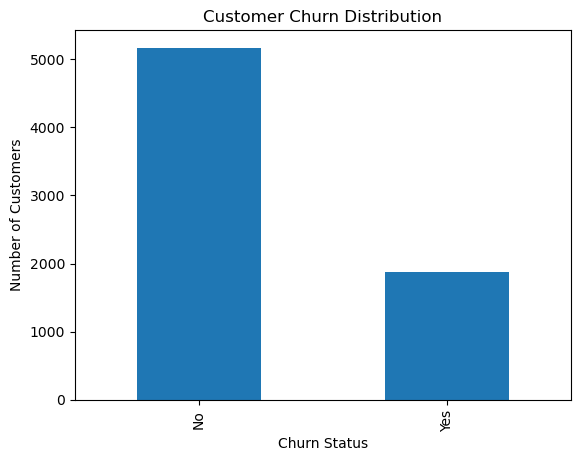

In [564]:
churn_counts = df["churn"].value_counts()

plt.figure()
churn_counts.plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

**Why this plot exists?**
- Confirms class imbalance
- Helps explain why churn analysis is not symmetric
- Recruiters expect this sanity check

## 17. Churn Rate by Customer Tenure

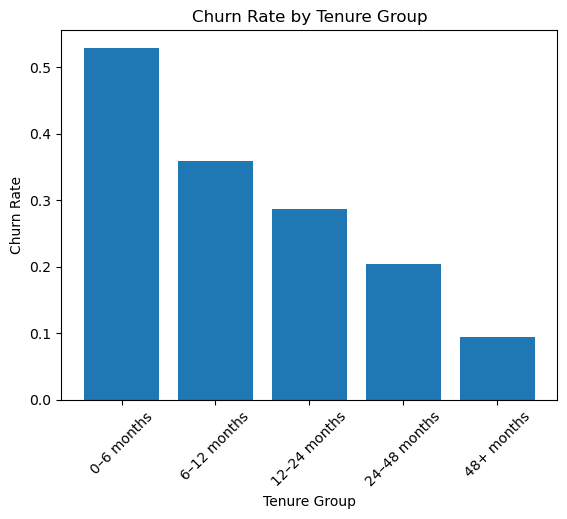

In [567]:
plt.figure()
plt.bar(tenure_churn["tenure_group"], tenure_churn["churn_flag"])
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

- Early tenure customers churn significantly more
- Retention improves with customer maturity

## 18. Churn Rate by Contract Type

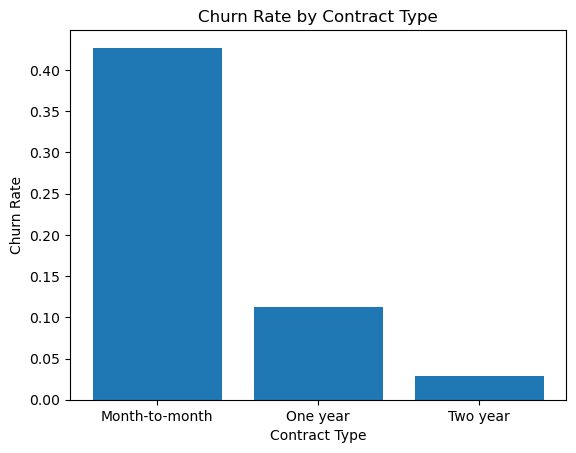

In [571]:
plt.figure()
plt.bar(contract_churn["contract"], contract_churn["churn_flag"])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

## 19. Churn Rate by Payment Method

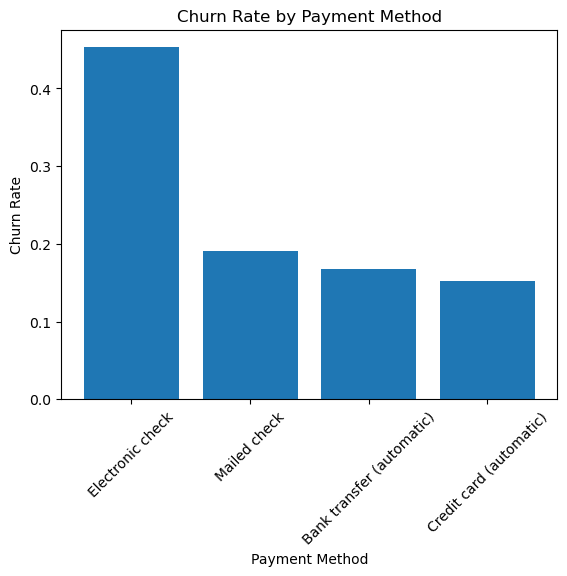

In [574]:
plt.figure()
plt.bar(payment_churn["paymentmethod"], payment_churn["churn_flag"])
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

## 20. Revenue Contribution by Churn Status

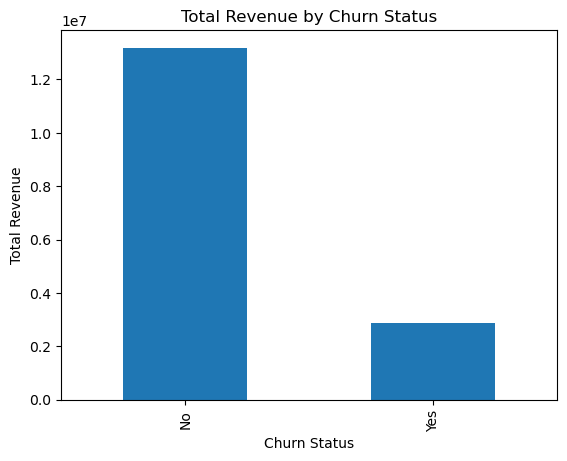

In [577]:
revenue_by_churn = df.groupby("churn")["totalcharges"].sum()

plt.figure()
revenue_by_churn.plot(kind="bar")
plt.title("Total Revenue by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Total Revenue")
plt.show()

## 21. Export Clean Dataset for SQL and Power BI

In [580]:
final_columns = [
    "customerid",
    "gender",
    "seniorcitizen",
    "partner",
    "dependents",
    "tenure",
    "tenure_group",
    "contract",
    "paymentmethod",
    "monthlycharges",
    "totalcharges",
    "customer_value",
    "churn",
    "churn_flag"
]

df_final = df[final_columns].copy()

In [582]:
df_final.to_csv("Telco_Cusomer_Churn.csv", index=False)

## 22. Python EDA Summary
- Cleaned and validated raw customer churn data
- Identified hidden missing values and corrected data types
- Analyzed churn drivers across tenure, contracts, and payment methods
- Quantified revenue leakage caused by customer churn
- Prepared a clean dataset for SQL analysis and Power BI dashboarding

In [585]:
df_check = pd.read_csv("Telco_Cusomer_Churn.csv")
df_check.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,tenure_group,contract,paymentmethod,monthlycharges,totalcharges,customer_value,churn,churn_flag
0,7590-VHVEG,Female,No,Yes,No,1,0–6 months,Month-to-month,Electronic check,29.85,29.85,Low Value,No,0
1,5575-GNVDE,Male,No,No,No,34,24–48 months,One year,Mailed check,56.95,1889.50,Mid Value,No,0
2,3668-QPYBK,Male,No,No,No,2,0–6 months,Month-to-month,Mailed check,53.85,108.15,Low Value,Yes,1
3,7795-CFOCW,Male,No,No,No,45,24–48 months,One year,Bank transfer (automatic),42.30,1840.75,Mid Value,No,0
4,9237-HQITU,Female,No,No,No,2,0–6 months,Month-to-month,Electronic check,70.70,151.65,Low Value,Yes,1


In [587]:
df_check.shape

(7043, 14)

In [589]:
df_check.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'tenure_group', 'contract', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'customer_value', 'churn', 'churn_flag'],
      dtype='object')

In [593]:
df_check[df_check["tenure"] == 0][["tenure", "monthlycharges", "totalcharges"]].head()

,tenure,monthlycharges,totalcharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0


- The cleaned and feature engineered dataset was successfully exported and validated for downstream SQL analysis and Power BI visualization.

In [596]:
!pip install psycopg2-binary sqlalchemy

In [598]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port="2002",
    user="postgres",
    password="sasank2002",
    dbname="customer_churn"
)

print("Connected successfully")
conn.close()


Connected successfully


In [600]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "sasank2002" # the password you set during installation
host = "localhost"         # if running locally
port = "2002"              # default PostgreSQL port
database = "customer_churn"    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "churn_customer"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'churn_customer' in database 'customer_churn'.
